# Notebook analyzing WhatsApp Group Chat Data

In [18]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

# NLTK stopwords download
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andilejaden/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load and clean the data

In [19]:
df = pd.read_csv('../datasets/python_byo_chat_log.csv')

In [20]:
# Strip any leading/trailing spaces from the column headers
df.columns = df.columns.str.strip()

In [21]:
# Clean the 'Date' column by stripping spaces
df['Date'] = df['Date'].str.strip()

In [22]:
# Convert 'Date' and 'Time' columns to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Time'] = pd.to_datetime(df['Time'].str.strip(), format='%H:%M:%S', errors='coerce').dt.time

In [23]:
# Drop rows with NaT in 'Date' or NaT in 'Time'
df.dropna(subset=['Date', 'Time'], inplace=True)

In [24]:
# Converting 'Message' column to string and removing NaN values
df['Message'] = df['Message'].astype(str)
df.dropna(subset=['Message'], inplace=True)

# 1. Top 10 participants in the group

In [25]:
top_participants = df['Sender'].value_counts().head(10)
print("Top 10 Participants:")
print(top_participants)

Top 10 Participants:
Sender
Mpumelelo Mpumi Nyathi    1138
Vuyisile                  1036
~ Pickã-Čhu                675
~ RodneyMM                 469
Google Jr                  356
Henry Ndou                 328
Tyrone                     325
~ VNDM                     252
Sabelo Python              232
Thabhelo US                219
Name: count, dtype: int64


## 2. Day with the most activity

In [26]:
most_active_day = df['Date'].value_counts().idxmax()
print("\nDay with the most activity:", most_active_day.date())


Day with the most activity: 2024-01-23


## 3. Most active time during the day

In [27]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)
most_active_time = df['Hour'].value_counts().idxmax()
print("\nMost active time during the day:", most_active_time, ":00")


Most active time during the day: 14 :00


## 4. Commonly used words

In [28]:
stop_words = set(stopwords.words('english'))
def preprocess_message(message):
    message = re.sub(r'[^\w\s]', '', message).lower()
    return message

## Combining all messages into a single string

In [29]:
all_messages = ' '.join(df['Message'].apply(preprocess_message))

In [30]:
# Tokenizing the string into words. Magic happens here!
words = all_messages.split()

In [31]:
# Removing stopwords
words = [word for word in words if word not in stop_words]

In [32]:
# Counting the frequency of each word using built-in Counter for efficiency
word_freq = Counter(words)

# Get the 20 most common words. You can filter out some words if needed e.g. yes, no, ok, etc.
most_common_words = word_freq.most_common(20)
print("\nMost Commonly Used Words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Most Commonly Used Words:
like: 488
5: 459
use: 453
using: 445
im: 404
one: 395
get: 379
dont: 373
message: 369
need: 353
know: 310
good: 305
data: 300
work: 294
code: 293
people: 290
think: 289
would: 276
thats: 268
omitted: 254


## Top 10 participants

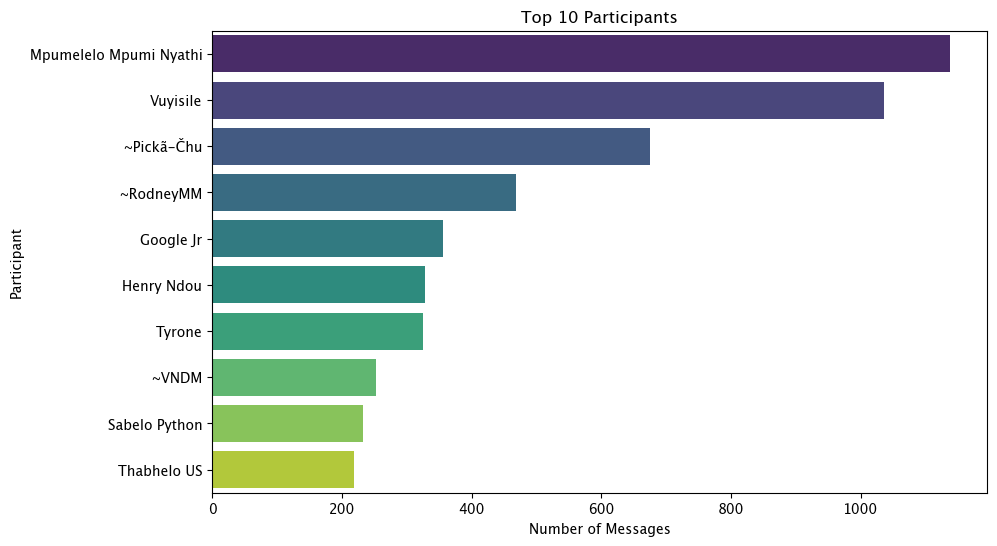

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_participants.values, y=top_participants.index, palette='viridis', hue=top_participants.index)
plt.title('Top 10 Participants')
plt.xlabel('Number of Messages')
plt.ylabel('Participant')
plt.show()

## Message count by hour

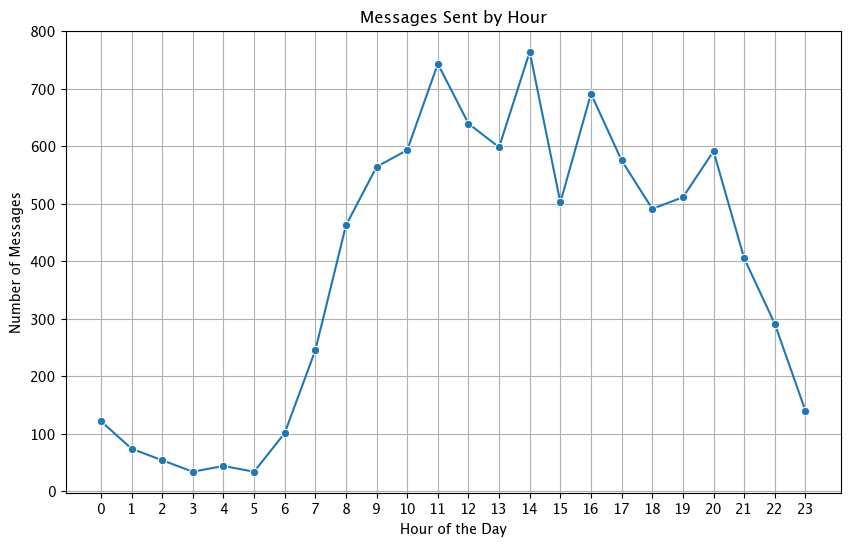

In [34]:
hourly_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Messages Sent by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## Generate a word cloud

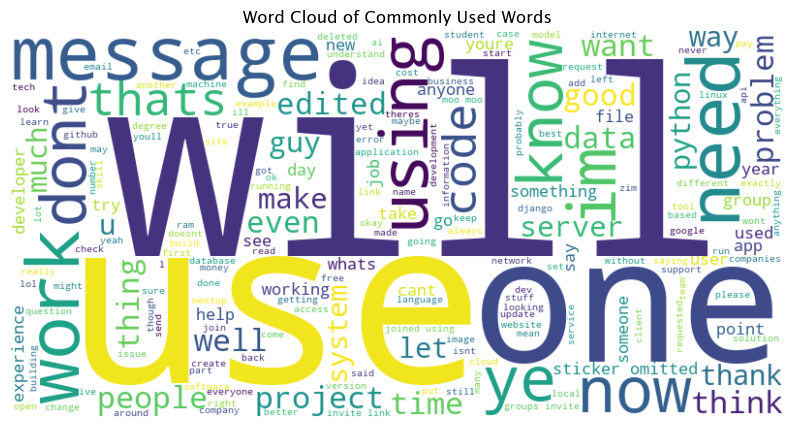

In [35]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Commonly Used Words')
plt.show()